In [1]:
# DRAW 2D NEMO FIELD ON MAP PROJECTION
# GM 7/10/16: Currently writing script to visualise mean dynamic topography in Arctic, but it will be generalised to plot any 2D field in any region

In [11]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import scipy.io as io

In [3]:
# SPECIFY VARIABLE THAT YOU WISH TO PLOT
varname = 'sossheig'

In [15]:
# DATA LOCATION
# Point to location where NEMO netcdf file is held
rootdir = '/Volumes/ocean2/graemem/arctic_carbon/'
filename = 'ORCA12.L46-MJM88_y2008_gridT.nc'
# Point to location where ABO CTD data is located
asbodir = '/Users/graemem/Documents/MATLAB/2012_asbo_carbseq/ctdsection/'

In [7]:
# LOAD DATA
# Including desired variable and latitude and longitude
data=Dataset(rootdir+filename,'r')
var = data.variables[varname][0,:,:]
nav_lon = data.variables['nav_lon'][:,:]
nav_lat = data.variables['nav_lat'][:,:]
print var.shape

(3059, 4322)


In [28]:
# LOAD ASBO CTD STATION LOCATIONS
dav = io.loadmat(asbodir+'davis_2005.mat')
fra = io.loadmat(asbodir+'fram_2005.mat')
bar = io.loadmat(asbodir+'barents_2005.mat')
ber = io.loadmat(asbodir+'bering_2005.mat')

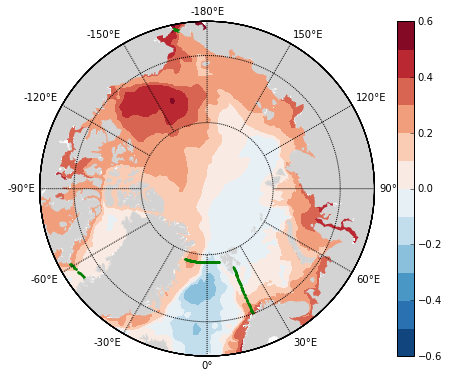

In [51]:
# PLOT THE VARIABLE
vmin = -0.6
vmax = 0.6
levels = np.arange(vmin,vmax+0.1,0.1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
map1 = Basemap(projection='npstere',lon_0 = 0,boundinglat = 65,round=True,resolution='l')
map1.fillcontinents(color='lightgrey',lake_color='lightgrey')
#map1.drawcoastlines()
map1.drawparallels(np.arange(60,90,10))
map1.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,0],fontsize=10)
x,y = map1(nav_lon,nav_lat)

pc = map1.contourf(x,y,var,levels=levels,cmap=plt.cm.RdBu_r)
cb = plt.colorbar(pc,ax=ax)

x,y = map1(dav['lon'],dav['lat'])
map1.scatter(x,y,3,color='g')
x,y = map1(fra['lon'],fra['lat'])
map1.scatter(x,y,3,color='g')
x,y = map1(bar['lon'],bar['lat'])
map1.scatter(x,y,3,color='g')
x,y = map1(ber['lon'],ber['lat'])
map1.scatter(x,y,3,color='g')

# SAVE FIGURE
plt.savefig('/Volumes/ocean2/graemem/arctic_carbon/figures/contourf_MDT_arctic.eps',transparent=True)